In [1]:
import wandb
import pandas as pd

In [58]:
# fetch the artifact we just created (sample.csv) from W&B and read it with pandas
run = wandb.init(project='nyc_airbnb', group='eda', save_code=True)
local_path = wandb.use_artifact('sample.csv:latest').file()
df = pd.read_csv(local_path)

In [59]:
df_orig = df.copy(deep=True)

In [60]:
print(df.shape)
df.head()

(20000, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [6]:
df.shape[0] == df['id'].nunique()

True

In [8]:
# plot libs
import matplotlib.pyplot as plt
import seaborn as sns

/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='price'>

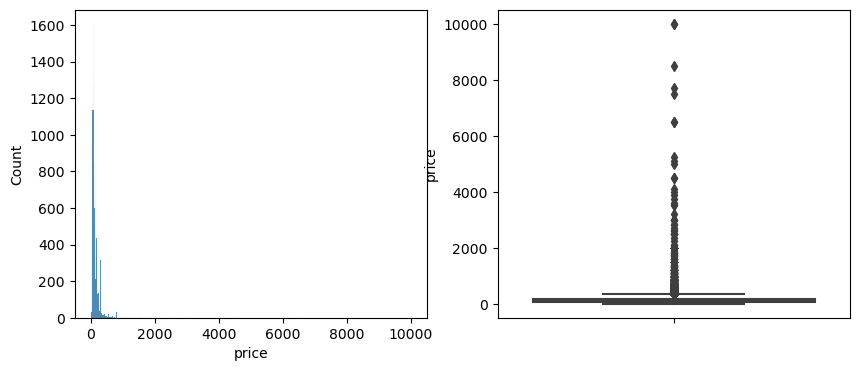

In [61]:
# check response (price) distribution
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['price'], ax=axs[0])
sns.boxplot(data=df, y='price', ax=axs[1])

In [62]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='price'>

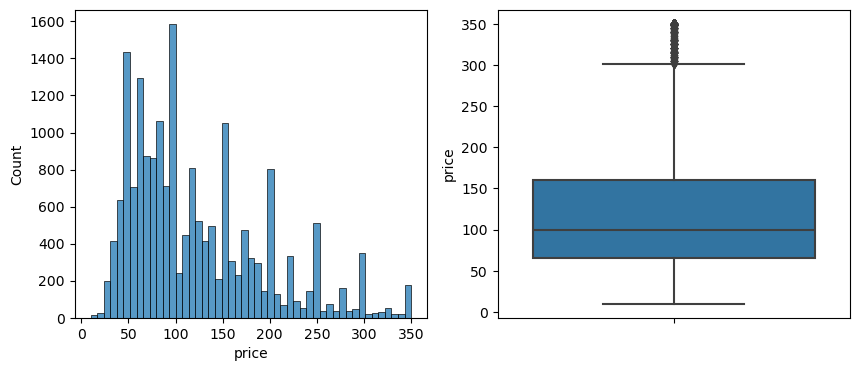

In [63]:
# check response (price) distribution
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['price'], ax=axs[0])
sns.boxplot(data=df, y='price', ax=axs[1])

<Axes: xlabel='last_review'>

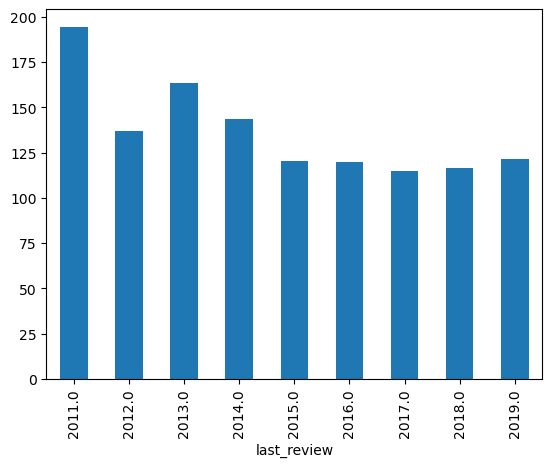

In [64]:
df.groupby(df['last_review'].dt.year).price.mean().plot(kind='bar')

/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/

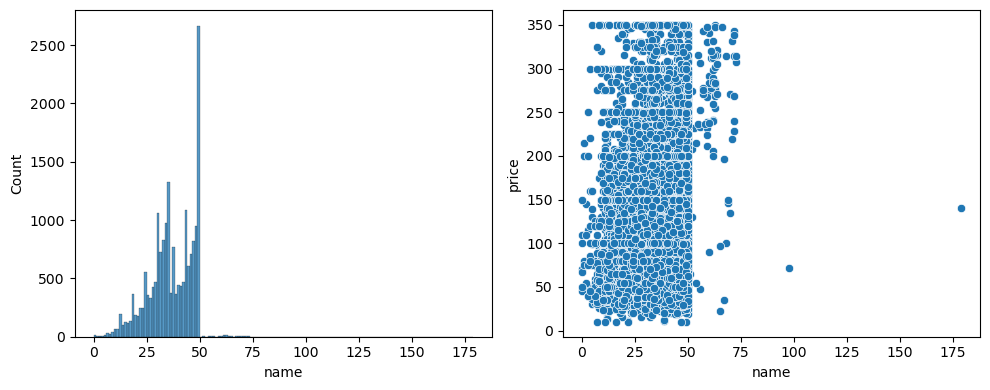

In [65]:
# check 'name' length distribution
names = df['name'].fillna('')
name_length = names.apply(lambda x: len(x))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(name_length, ax=axs[0])
sns.scatterplot(x=name_length, y=df['price'], ax=axs[1])
plt.tight_layout()
plt.show()

In [12]:
df['host_name'].nunique()

6517

In [66]:
# let's create a feature that counts how many properties a host has and then check if it has any relation to price
cont = df.groupby('host_name').size().reset_index()
cont.columns=['host_name', 'qty_prop']
df = pd.merge(df, cont, how='left')
print(df.shape)
df.head(2)

(19001, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,qty_prop
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5,9.0
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaT,NaN,1,188,1.0


/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/

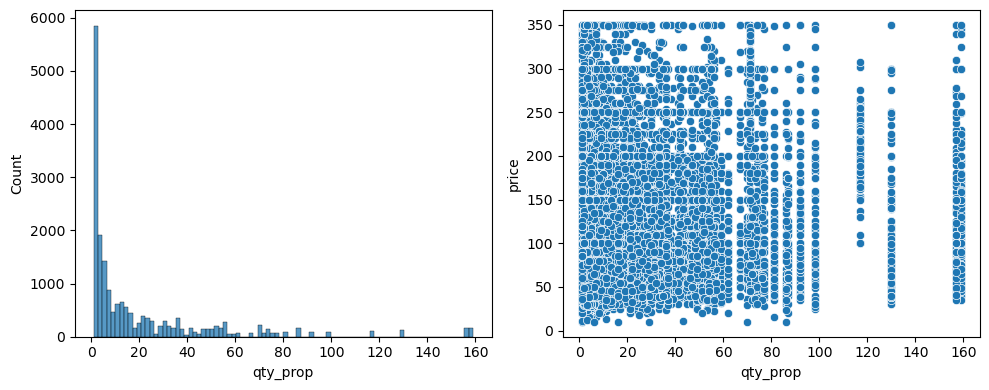

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['qty_prop'], ax=axs[0])
sns.scatterplot(data=df, x='qty_prop', y='price', ax=axs[1])
plt.tight_layout()
plt.show()

/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='neighbourhood_group', ylabel='price'>

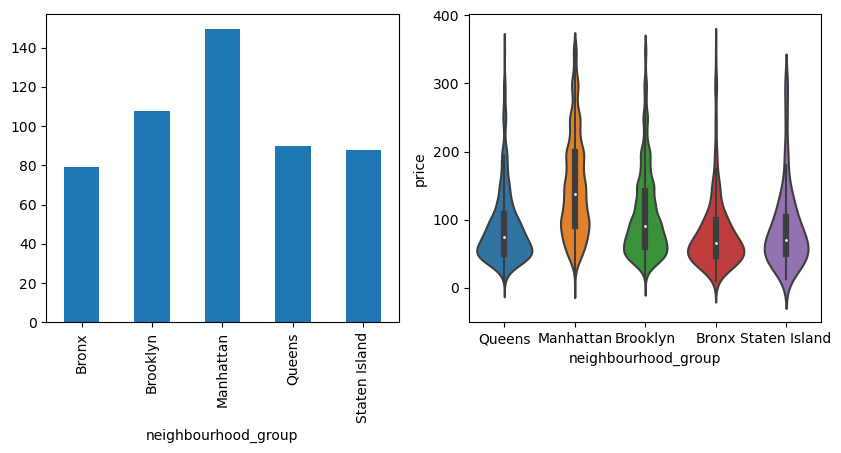

In [68]:
# now let's check how prices vary based on the borough
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
df.groupby('neighbourhood_group').price.mean().plot(kind='bar', ax=axs[0])
sns.violinplot(data=df, y='price', x='neighbourhood_group', ax=axs[1])

In [50]:
df['neighbourhood'].nunique()

217

In [69]:
# let's create a feature that counts how many properties a host has and then check if it has any relation to price
cont = df.groupby('neighbourhood').size().reset_index()
cont.columns=['neighbourhood', 'qty_prop_neighbourhood']
df = pd.merge(df, cont, how='left')
print(df.shape)
df.head(2)

(19001, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,qty_prop,qty_prop_neighbourhood
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5,9.0,142
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaT,NaN,1,188,1.0,693


/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/

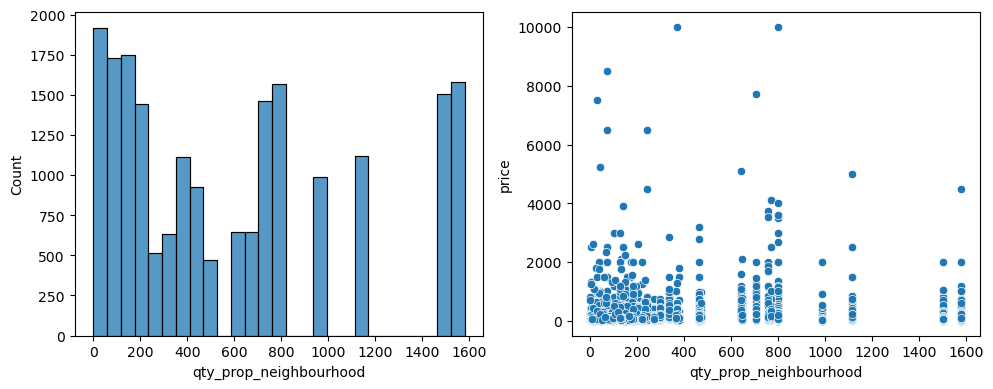

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['qty_prop_neighbourhood'], ax=axs[0])
sns.scatterplot(data=df, x='qty_prop_neighbourhood', y='price', ax=axs[1])
plt.tight_layout()
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

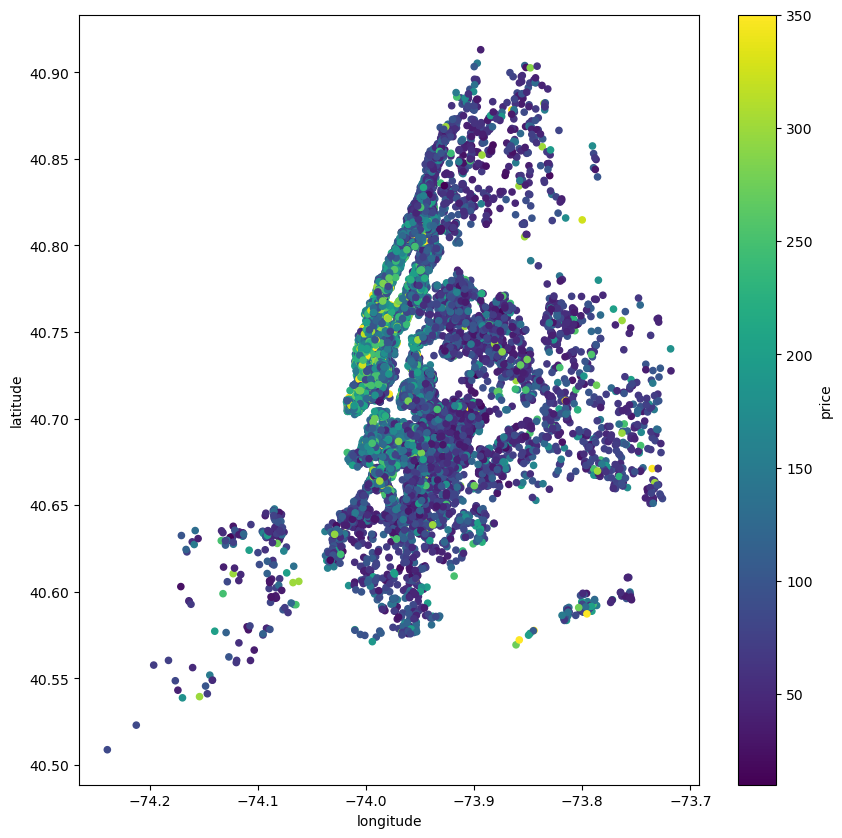

In [70]:
df.plot.scatter('longitude', 'latitude', c='price', colormap='viridis', figsize=(10,10))

In [72]:
df['room_type'].nunique()

3

/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='room_type', ylabel='price'>

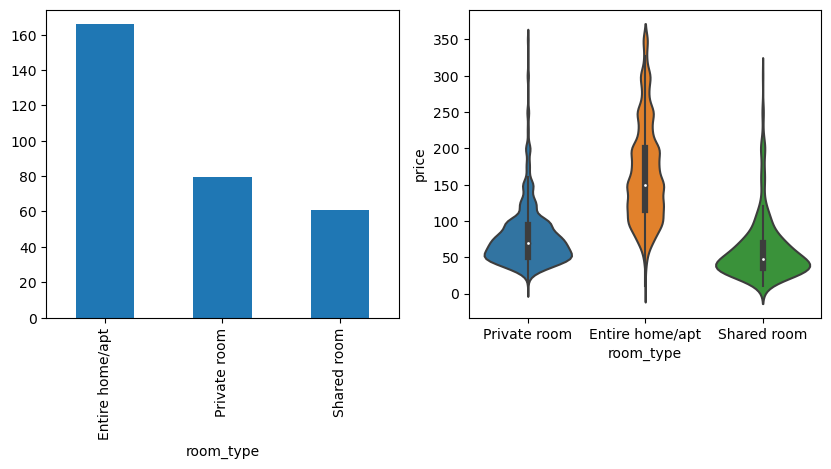

In [73]:
# now let's check how prices vary based on the borough
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
df.groupby('room_type').price.mean().plot(kind='bar', ax=axs[0])
sns.violinplot(data=df, y='price', x='room_type', ax=axs[1])

In [74]:
df['minimum_nights'].nunique()

75

/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/

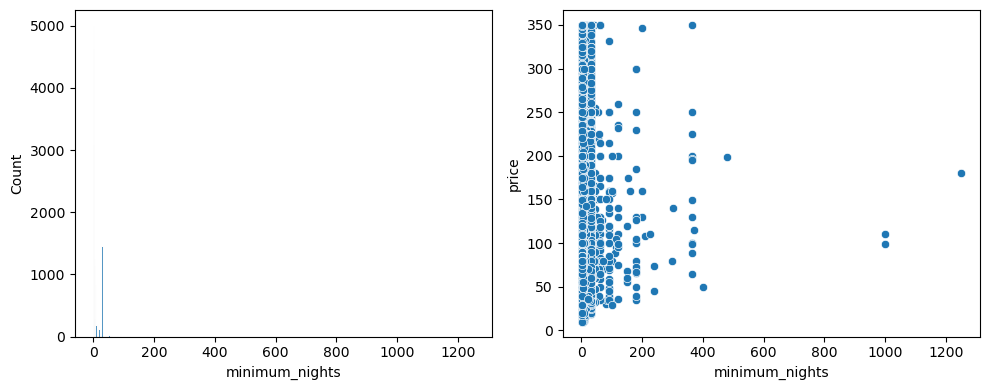

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['minimum_nights'], ax=axs[0])
sns.scatterplot(data=df, x='minimum_nights', y='price', ax=axs[1])
plt.tight_layout()
plt.show()

/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/

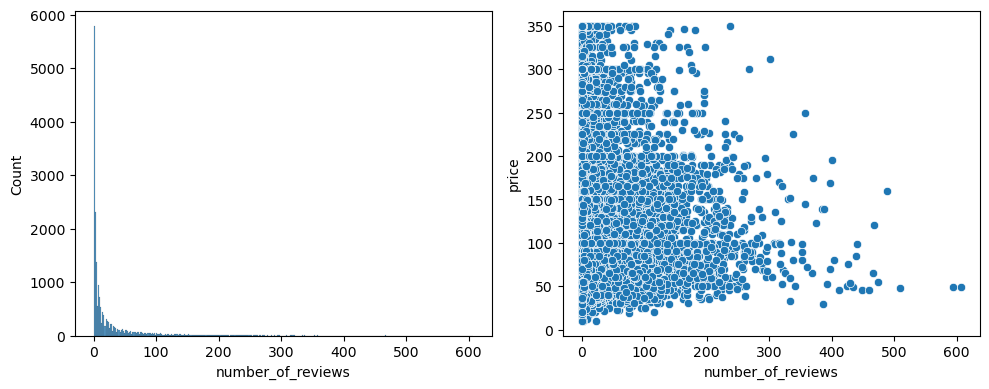

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['number_of_reviews'], ax=axs[0])
sns.scatterplot(data=df, x='number_of_reviews', y='price', ax=axs[1])
plt.tight_layout()
plt.show()

/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/

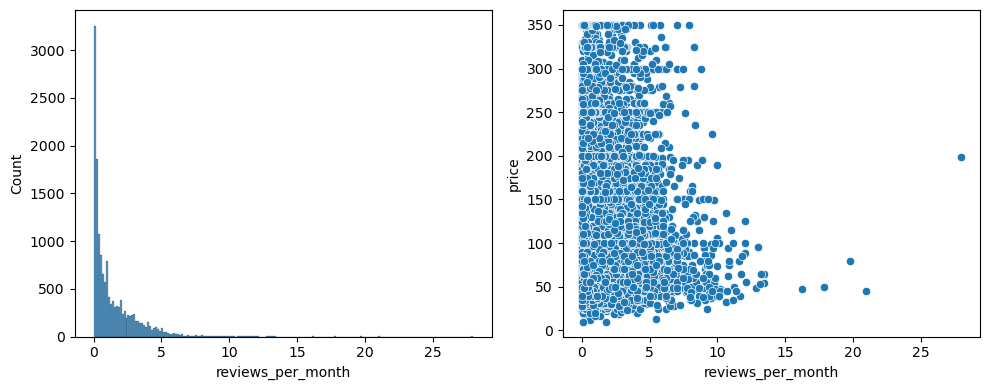

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['reviews_per_month'], ax=axs[0])
sns.scatterplot(data=df, x='reviews_per_month', y='price', ax=axs[1])
plt.tight_layout()
plt.show()

In [79]:
df['calculated_host_listings_count'].nunique()

47

/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/

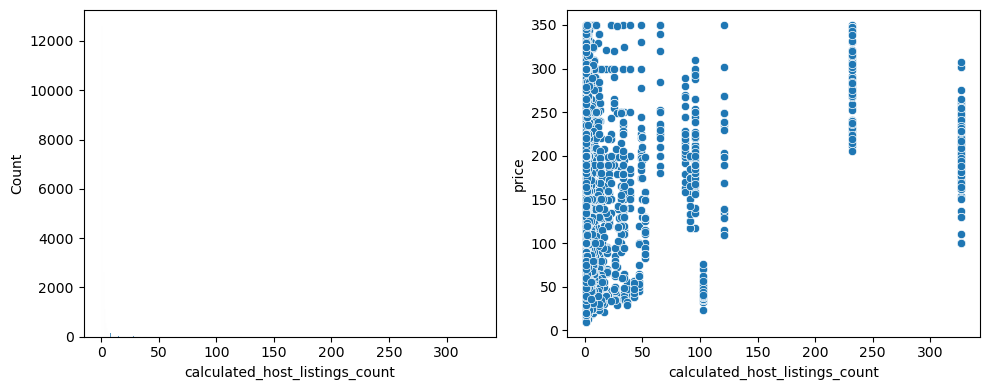

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['calculated_host_listings_count'], ax=axs[0])
sns.scatterplot(data=df, x='calculated_host_listings_count', y='price', ax=axs[1])
plt.tight_layout()
plt.show()

In [81]:
df['availability_365'].nunique()

366

/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chafund/miniconda3/envs/mlflow-4a220aef75ef4d8931a381621c9bd28cca9caaf5/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chafund/miniconda3/envs/

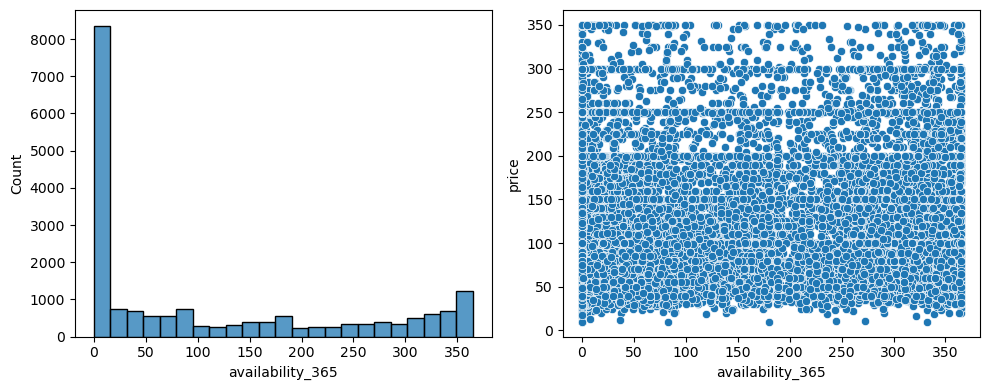

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['availability_365'], ax=axs[0])
sns.scatterplot(data=df, x='availability_365', y='price', ax=axs[1])
plt.tight_layout()
plt.show()

In [53]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,qty_prop,qty_prop_neighbourhood
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5,9.0,142


In [83]:
run.finish()